# High Dim

### vstack vs MC

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
def integrand(x):
    return np.prod(x, axis=1)

In [4]:
def deterministic_integration(d, n):
    grid = np.linspace(0, 1, n)
    mesh = np.meshgrid(*([grid] * d))
    points = np.vstack([m.ravel() for m in mesh]).T
    f_values = integrand(points)
    volume = 1.0  # Volume of the integration domain
    integral = volume * np.mean(f_values)
    return integral

In [5]:
def monte_carlo_integration(d, N):
    samples = np.random.uniform(0, 1, size=(N, d))
    f_values = integrand(samples)
    integral = np.mean(f_values)
    return integral

In [7]:
# dimensions = [2, 4, 6]
dimensions = [2, 4, 6, 8, 10]
n = 10  # Grid points per dimension for deterministic method
N = int(1e6)  # Number of samples for Monte Carlo method

deterministic_results = []
monte_carlo_results = []
exact_values = []
deterministic_times = []
monte_carlo_times = []

for d in dimensions:
    print(f"Dimension: {d}")
    exact_value = 0.5 ** d
    exact_values.append(exact_value)
    print(f"Exact Result: {exact_value}")
    
    # Deterministic method
    start_time = time.time()
    try:
        det_result = deterministic_integration(d, n)
        det_time = time.time() - start_time
        deterministic_results.append(det_result)
        deterministic_times.append(det_time)
        print(f"Deterministic Result: {det_result}, Time: {det_time:.4f} s")
    except MemoryError:
        print("Deterministic method ran out of memory.")
        deterministic_results.append(None)
        deterministic_times.append(None)
    
    # Monte Carlo method
    start_time = time.time()
    mc_result = monte_carlo_integration(d, N)
    mc_time = time.time() - start_time
    monte_carlo_results.append(mc_result)
    monte_carlo_times.append(mc_time)
    print(f"Monte Carlo Result: {mc_result}, Time: {mc_time:.4f} s\n")

Dimension: 2
Exact Result: 0.25
Deterministic Result: 0.25, Time: 0.0000 s
Monte Carlo Result: 0.24985722145978612, Time: 0.0250 s

Dimension: 4
Exact Result: 0.0625
Deterministic Result: 0.062499999999999986, Time: 0.0010 s
Monte Carlo Result: 0.06263593383333844, Time: 0.0410 s

Dimension: 6
Exact Result: 0.015625
Deterministic Result: 0.015624999999999993, Time: 0.0230 s
Monte Carlo Result: 0.015641798500395848, Time: 0.0550 s

Dimension: 8
Exact Result: 0.00390625
Deterministic Result: 0.003906249999999993, Time: 7.9089 s
Monte Carlo Result: 0.0039126051573521205, Time: 0.0770 s

Dimension: 10
Exact Result: 0.0009765625
Deterministic method ran out of memory.
Monte Carlo Result: 0.00098035506731046, Time: 0.0910 s



到dim=10，我的内存(16GB)就不够了。可以参考我的任务管理器。

#### Theoretical Memory

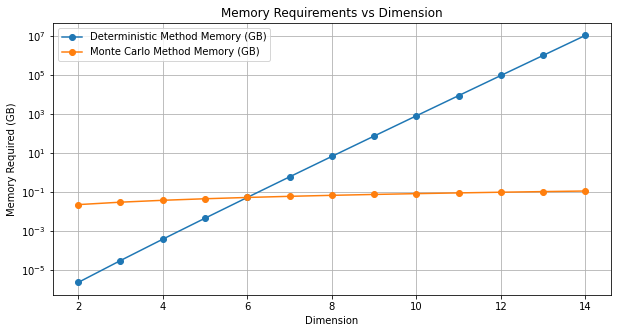

In [8]:
dimensions = np.arange(2, 15, 1)
n = 10  # Grid points per dimension
N_mc = int(1e6)  # Number of Monte Carlo samples

memory_deterministic = []
memory_monte_carlo = []

for d in dimensions:
    N_det = np.power(n, d, dtype=np.int64)
    mem_det = N_det * (8 * d + 8)  # Bytes
    mem_mc = N_mc * (8 * d + 8)  # Bytes
    memory_deterministic.append(mem_det / (1024 ** 3))  # Convert to GB
    memory_monte_carlo.append(mem_mc / (1024 ** 2))  # Convert to MB

plt.figure(figsize=(10, 5))
plt.plot(dimensions, memory_deterministic, label='Deterministic Method Memory (GB)', marker='o')
plt.plot(dimensions, np.array(memory_monte_carlo) / 1024, label='Monte Carlo Method Memory (GB)', marker='o')
plt.yscale('log')
plt.xlabel('Dimension')
plt.ylabel('Memory Required (GB)')
plt.title('Memory Requirements vs Dimension')
plt.legend()
plt.grid(True)
plt.show()

### Scipy vs MC

In [9]:
def integrand_nquad(*args):
    return np.prod(args)

def deterministic_integration_nquad(d):
    # Define integration limits for each dimension
    limits = [[0, 1]] * d  # Integration over [0,1] in each dimension
    # Perform the integration
    result, error = integrate.nquad(integrand_nquad, limits)
    return result, error

In [10]:
dimensions = [1, 2, 3, 4, 5]
N = int(1e6)  # Number of Monte Carlo samples

deterministic_results_nquad = []
deterministic_times_nquad = []
monte_carlo_results = []
monte_carlo_times = []
exact_values = []

for d in dimensions:
    print(f"Dimension: {d}")
    exact_value = 0.5 ** d
    exact_values.append(exact_value)
    print(f"Exact Result: {exact_value}")
    
    # Deterministic method using nquad
    start_time = time.time()
    result, error = deterministic_integration_nquad(d)
    det_time = time.time() - start_time
    deterministic_results_nquad.append(result)
    deterministic_times_nquad.append(det_time)
    print(f"Deterministic Result: {result}, Time: {det_time:.4f} s")
    
    # Monte Carlo method
    start_time = time.time()
    mc_result = monte_carlo_integration(d, N)
    mc_time = time.time() - start_time
    monte_carlo_results.append(mc_result)
    monte_carlo_times.append(mc_time)
    print(f"Monte Carlo Result: {mc_result}, Time: {mc_time:.4f} s\n")


Dimension: 1
Exact Result: 0.5
Deterministic Result: 0.5, Time: 0.0010 s
Monte Carlo Result: 0.49988901154963516, Time: 0.0100 s

Dimension: 2
Exact Result: 0.25
Deterministic Result: 0.24999999999999997, Time: 0.0030 s
Monte Carlo Result: 0.25019509851577154, Time: 0.0230 s

Dimension: 3
Exact Result: 0.125
Deterministic Result: 0.12499999999999999, Time: 0.0370 s
Monte Carlo Result: 0.12491065645695344, Time: 0.0300 s

Dimension: 4
Exact Result: 0.0625
Deterministic Result: 0.06249999999999999, Time: 0.8590 s
Monte Carlo Result: 0.06256994193560911, Time: 0.0420 s

Dimension: 5
Exact Result: 0.03125
Deterministic Result: 0.031249999999999997, Time: 17.8211 s
Monte Carlo Result: 0.031216485124898267, Time: 0.0440 s



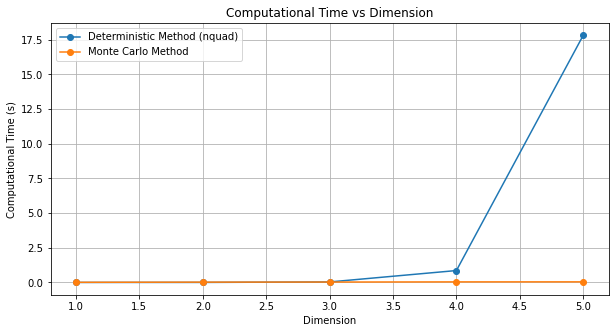

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dimensions, deterministic_times_nquad, label='Deterministic Method (nquad)', marker='o')
plt.plot(dimensions, monte_carlo_times, label='Monte Carlo Method', marker='o')
plt.xlabel('Dimension')
plt.ylabel('Computational Time (s)')
plt.title('Computational Time vs Dimension')
plt.legend()
plt.grid(True)
plt.show()

运行时间和维度无关。

### MC Error

Below I will show that the error of MC (or the variance, since the bias is 0) is determined by `n_samples`, not `n_dim`.

我的目标是证明，在蒙特卡洛积分中，误差（或方差）主要由样本数量决定，而不是由积分的维度决定。

为了说明这一点，我构造了一个Mean和Var都和维度无关的函数。原因如下：
1. 控制变量
2. 在复杂的高维问题中，积分区域的“体积”分布可能导致MC方法的效率降低，从而导致方差和维度有关

In [12]:
def f(n_dim, x):
    x_mean = np.mean(x, axis=1)
    return np.sqrt(n_dim) * (x_mean - 0.5) + 1

In theory:
$$
E(f(x)) = 1
$$

$$
Var(f(x)) = \frac{1}{12} = 0.0833
$$

$$
Std(f(x)) = \sqrt{Var(f(x))} = 0.2887
$$

In [13]:
def monte_carlo_integration(n_dim, n_samples):
    """
    Perform Monte Carlo integration of the function
    f(x) = sqrt(n) * (mean(x) - 0.5) + 1
    over the n-dimensional unit hypercube [0,1]^n.

    Parameters:
    - n_dim: int, the number of dimensions.
    - n_samples: int, the number of Monte Carlo samples.

    Returns:
    - I_estimate: float, the estimated value of the integral.
    """
    # Generate random samples in the n-dimensional unit hypercube
    x = np.random.uniform(0, 1, size=(n_samples, n_dim))
    
    #
    fx = f(n_dim, x)
    
    # Calculate the Monte Carlo estimate of the integral
    I_estimate = np.mean(fx)
    
    return I_estimate, fx

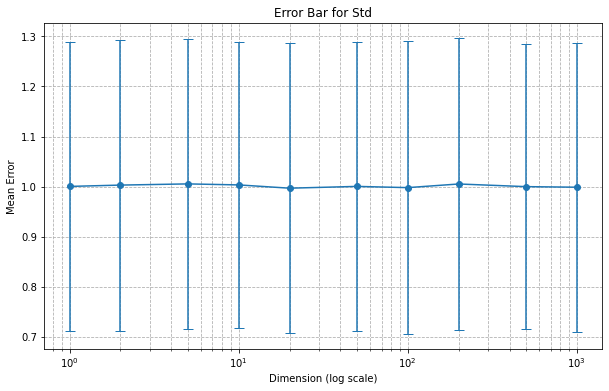

In [14]:
# True value of the integral for comparison
I_true = 1  # Since E[f(x)] = 1

# Define different dimensions to test
dimensions = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Number of Monte Carlo samples
n_samples = 10 ** 4

# Number of experiments for each dimension
n_exp = 1  # You can adjust this number as needed

# Arrays to store mean absolute errors and their standard deviations
means = []
stds = []

for n in dimensions:
    errors = []
    I_estimate, fx = monte_carlo_integration(n, n_samples)
    mean_now = np.mean(fx)
    std_now = np.std(fx)
    means.append(mean_now)
    stds.append(std_now)

# Plotting the mean absolute error vs. dimensions with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(dimensions, means, yerr=stds, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Dimension (log scale)')
plt.ylabel('Mean Error')
plt.title('Error Bar for Std')
plt.grid(True, which="both", ls="--")
plt.show()

Error和维度无关。

# Summary

1. 普通MC内存和维度无关。
2. 普通MC运行时间和维度无关。
3. 普通MC的Error和维度无关。